# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt 

In [2]:
# чтение файла
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
 # посмотрим первые строки таблицы
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# посмотрим информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# посмотрим описательную статистику
df.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

При обзоре данных были выявлены следующие проблемы:

* большое количество пропусков
* стилистические ошибки в названиях столбцов
* прыгающий регистр в названиях столбцов
* некорректные типы данных

## Предобработка данных

In [6]:
# просмотрим названия столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
# переименуем столбцы
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3km', 
                        'ponds_around3000': 'ponds_around_3km'})

In [8]:
# удостоверимся, что столбцы переименованы
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
# просмотрим количество пропусков
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3km         5518
parks_around_3km         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [10]:
# для наглядности выведем процент пропусков в каждом столбце
df.isna().sum().sort_values(ascending=False)/df.shape[0]*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around_3km        23.283683
parks_around_3km        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Немалое количество пропусков в столбце "балконы". Скорее всего, если количество балконов не указано, то оно равно нулю.

В столбце "апартаменты" очень большое количество пропусков. Скорей всего, этот параметр появился относительно недавно, потому данные для относительно старых записей отсутствуют. Апартаменты - не столь частое явление, потому заполним пропуски нулем.

Пропуски в столбце "сколько было размещено объявление", скорее всего, обусловлены тем, что объявление не прошло модерацию и потому не было опубликовано, но попало в датасет. Заполним нулем.

Есть также пропуски в названии населенного пункта, их немного, однако для нашего исследования они не годятся - их надо будет удалить.

Остальные пропуски выглядят логично - не все будут измерять расстояние до ближайшего аэропорта, водоема, центра города, равно как и высоту потолка, общее количество этажей, а также жилую площадь и площадь кухни. Эти пропуски трогать не будем.

In [11]:
# заполним пропуски в количестве этажей нулем и изменим тип данных
# в дальнейшем нам это потребуется для того, чтобы определить, является ли этот этаж
# первым, последним или ни тем, ни другим
df['floors_total'] = df['floors_total'].fillna(0).astype('int64')

In [12]:
# заполним пропуски в количестве балконов нулем и изменим тип данных
df['balcony'] = df['balcony'].fillna(0).astype('int64')

In [13]:
# проверим, что пропусков в столбце не осталось
df['balcony'].isna().sum()

0

In [14]:
# заполним пропуски нулем и изменим тип данных
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)

In [15]:
# проверим, что пропусков в столбце не осталось
df['is_apartment'].isna().sum()

0

In [16]:
# переведем столбец с датой в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [17]:
# изменим тип данных в стоимости
df['last_price'] = df['last_price'].astype('int64')

In [18]:
# проверим количество различных населенных пунктов
len(df['locality_name'].unique()) 

365

Довольно много уникальных значений, стоит проверить на возможные дубликаты.

In [19]:
# приведем к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

In [20]:
# просмотрим уникальные значения
df['locality_name'].unique() 

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Видно, что иногда вместо "ё" пишут "е".

In [21]:
# заменим все "ё" на "е"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [22]:
# посмотрим, уменьшилось ли количество уникальных значений
len(df['locality_name'].unique())

331

In [23]:
# удалим строки с пропусками, их всего 49, и они нам не пригодятся
df = df.dropna(subset=['locality_name'])

In [24]:
# проверим, что пропусков не осталось
df['locality_name'].isna().sum() 

0

In [25]:
# заполним пропуски нулем и поменяем тип
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int64')

In [68]:
# проверим, что пропусков не осталось
df['days_exposition'].isna().sum() 

0

## Расчёты и добавление результатов в таблицу

In [26]:
# посчитаем цену квадратного метра
df['price_per_m2'] = (df['last_price'] / df['total_area']).astype('int64')

In [27]:
# создаем столбец дня недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [28]:
#создаем столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

In [29]:
#создаем столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

In [30]:
#напишем функцию категоризации по этажам
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor']  == row['floors_total']:
        return 'последний'
    return 'другой'

In [31]:
# категоризируем этажи с помощью функции 
df['floor_category'] = df.apply(floor_category, axis = 1)

In [32]:
# добавим столбец соотношения жилой площади к общей
df['living_area_ratio'] = df['living_area'] / df['total_area']

In [33]:
# добавим столбец отношения площади кухни к общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [34]:
# просмотрим таблицу после всех преобразований
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_per_m2,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,NaN,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0.0,NaN,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0.0,NaN,0,110544,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,NaN,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289,88524,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

Изучим информацию о площади, цене, количестве комнат и высоте потолков.

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

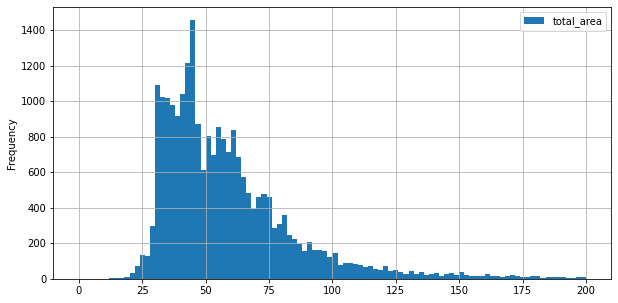

In [35]:
# изучим информацию о площади, построим гистограмму
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,200))
df['total_area'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

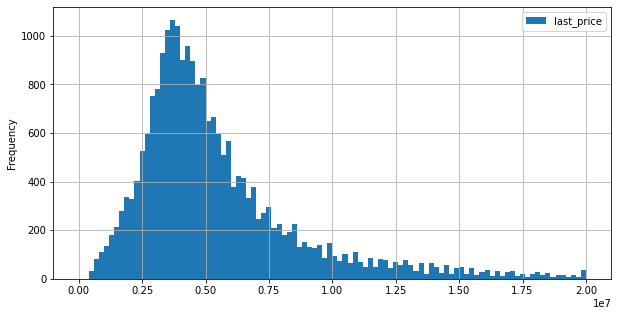

In [36]:
# изучим информацию о цене, построим гистограмму
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,20000000))
df['last_price'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

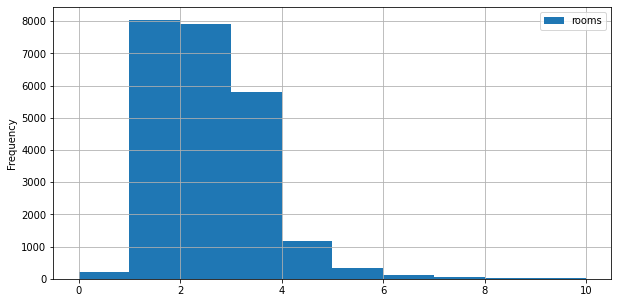

In [37]:
# изучим информацию о количестве комнат, построим гистограмму
df.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (10,5), range = (0,10))
df['rooms'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

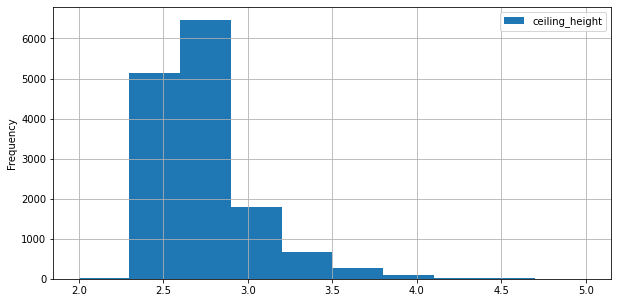

In [38]:
# изучим информацию о высоте потолков, построим гистограмму
df.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (10,5), range = (2,5))
df['ceiling_height'].describe()

**Вывод:** 

1. Минимальная площадь - 12 м2, максимальная - 900 м2, среднее значение - 60 м2, медиана - 52 м2.

2. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана - 4,7 млн руб.

3. Количество комнат - от 1 до 19. Больше всего однокомнатных и двухкомнатных квартир.

4. Высота потолков в среднем составляет 2,77 м, медиана - 2,65 м.

В данных есть аномальные значения: 0 комнат, высота потолка в 1 или 100 метров, а также цена квартиры в 12190 рублей.

Изучим время продажи квартиры.

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

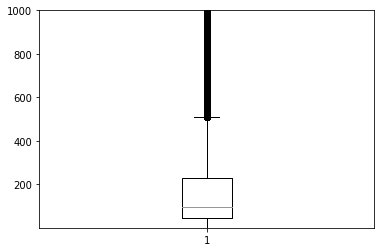

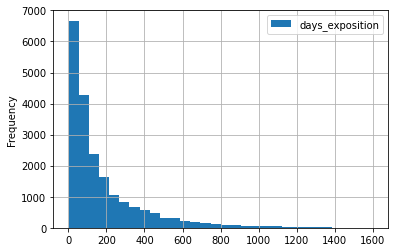

In [39]:
# диаграмма размаха
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)
# гистограмма
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
# среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()

Судя по гистограмме, мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Межквартильный размах - от 22 до 198 дней. Согласно "ящику с усами", значения более примерно 500 дней являются выбросами.

<AxesSubplot:ylabel='Frequency'>

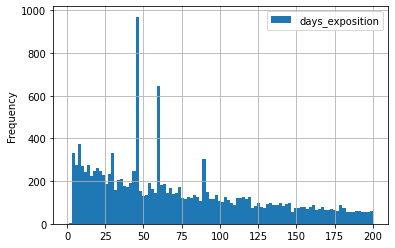

In [40]:
# сделаем гистограмму со значениями от 0 до 200 с кол-вом корзин 100
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

На гистограмме видны аномалии. Посмотрим, каким значениям они соответствуют.

In [41]:
df['days_exposition'].value_counts().head(10)

0     3180
45     879
60     538
7      234
30     208
90     203
4      174
3      158
5      152
14     148
Name: days_exposition, dtype: int64

Чаще всего встречается значение в 0 дней - этим значением мы заполнили пропуски.

45, 60, 7, 30, 90 дней - довольно популярное количество дней до снятия объявления. Скорей всего, причина в том, что, согласно правилам Яндекс.Недвижимости, именно спустя столько дней объявление начинает считаться неактуальным и автоматически снимается https://yandex.ru/support/realty/owner/home/add-ads-housing.html

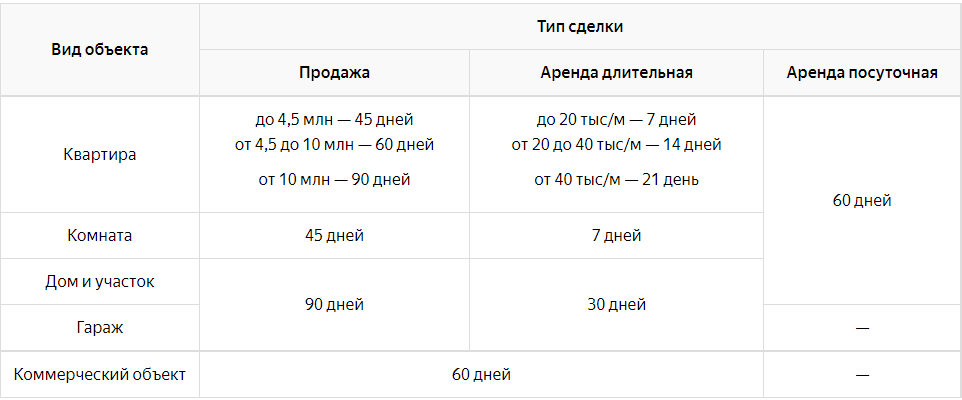

Уберем редкие и выбивающиеся значения.

In [42]:
def del_outliers(df, column, box=0, info=0, x=10, y=10):
    '''
    Функция для удаления выбросов
    Выбросами считаем данные меньше (Q1 - 1,5 * IQR) 
    и больше (Q3 + 1,5 * IQR), 
    где IQR - это разница между Q3 и Q1
    '''    
    
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    result = df.loc[(df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))]
    if info == 1:
        print(result[column].describe())
    if box == 1:
        return result.boxplot([column], figsize=(x,y))
    return result

count    22406.000000
mean        54.325685
std         19.349559
min         12.000000
25%         39.400000
50%         50.100000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64


(0.0, 120.0)

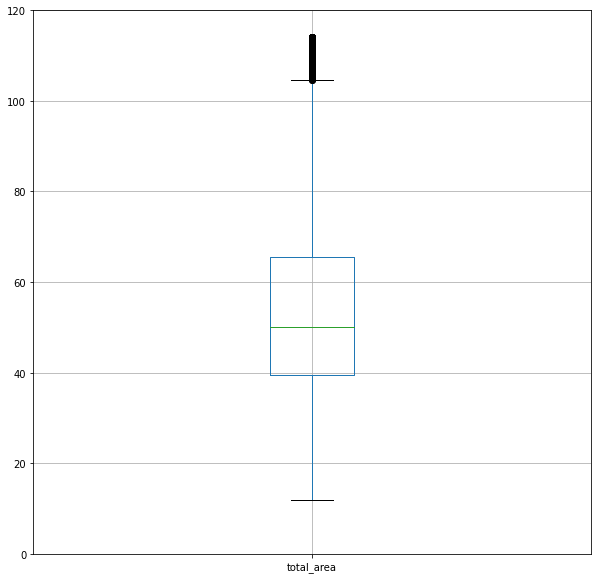

In [43]:
# удаляем выбросы в площади
del_outliers(df,'total_area',1,1).set_ylim(0,120)

count    2.159500e+04
mean     4.838942e+06
std      2.217282e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.189440e+07
Name: last_price, dtype: float64


(0.0, 12000000.0)

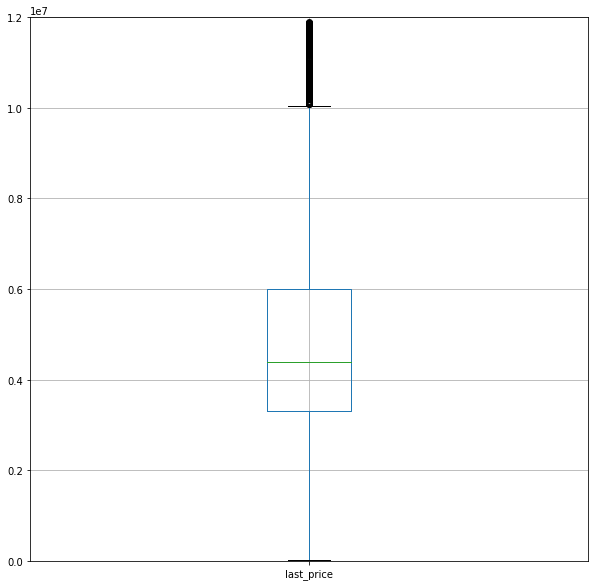

In [44]:
# удаляем выбросы в цене
del_outliers(df,'last_price',1,1).set_ylim(0,12000000)

count    21624.000000
mean       103.705651
std        111.786139
min          0.000000
25%         18.000000
50%         61.000000
75%        153.000000
max        462.000000
Name: days_exposition, dtype: float64


(0.0, 500.0)

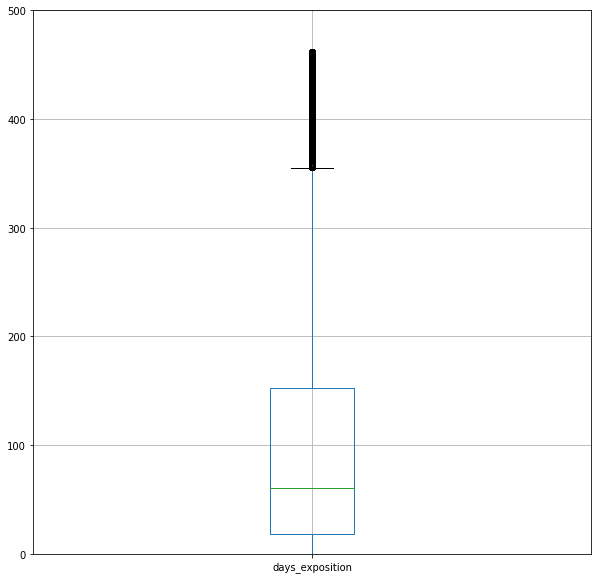

In [45]:
# удаляем выбросы в количестве дней
del_outliers(df,'days_exposition',1,1).set_ylim(0,500)

count     22559.000000
mean      93773.011791
std       28631.983672
min       20140.000000
25%       76123.500000
50%       93913.000000
75%      111428.000000
max      170731.000000
Name: price_per_m2, dtype: float64


(0.0, 180000.0)

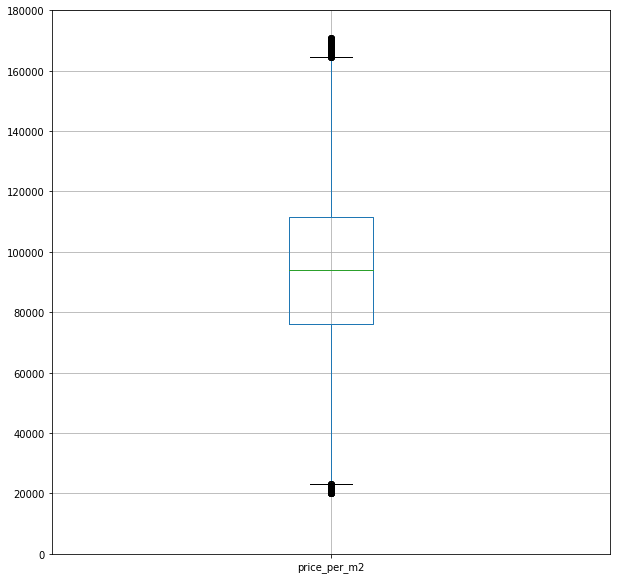

In [46]:
# удаляем выбросы в цене за квадратный метр
del_outliers(df,'price_per_m2',1,1).set_ylim(0,180000)

Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [47]:
# построим таблицу корреляции
corr_table = df[['price_per_m2',\
           'total_area',\
           'city_centers_nearest',\
           'rooms']].corr()
corr_table

,price_per_m2,total_area,city_centers_nearest,rooms
price_per_m2,1.000000,0.302202,-0.318099,0.055470
total_area,0.302202,1.000000,-0.231904,0.758745
city_centers_nearest,-0.318099,-0.231904,1.000000,-0.184322
rooms,0.055470,0.758745,-0.184322,1.000000


По таблице корреляции можно увидеть зависимость стоимости от площади - чем больше площадь, тем выше цена.

0.3022016339711138

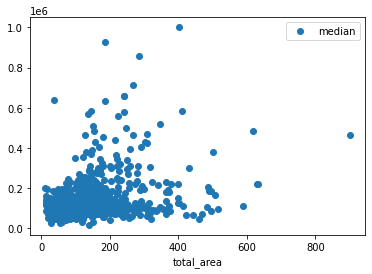

In [48]:
# посмотрим зависимость стоимости квадратного метра от общей площади
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
df['total_area'].corr(df['price_per_m2'])

Как видим, чем больше площадь,тем слегка выше цена.

0.055470370370160955

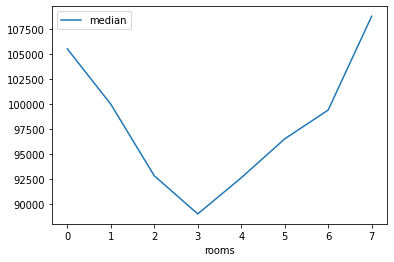

In [49]:
# посмотрим зависимость стоимости квадратного метра от количества комнат
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
df['rooms'].corr(df['price_per_m2'])

Дешевле всего стоят трехкомнатные квартиры.

,mean,count,median
floor_category,,,
другой,103507.587891,17408,98305.0
первый,81988.862637,2912,81236.5
последний,93378.509009,3330,87763.0


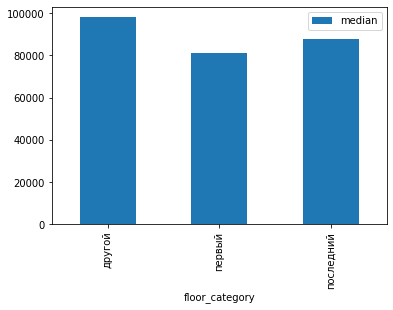

In [50]:
# посмотрим зависимость стоимости квадратного метра от этажа
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y='median', kind='bar')
pivot_table_floor_category

Квартиры на первом этаже стоят дешевле, чем на последнем. Квартиры, которые расположены не на первом и не последнем этаже, стоят больше всего.

-0.31809935794061367

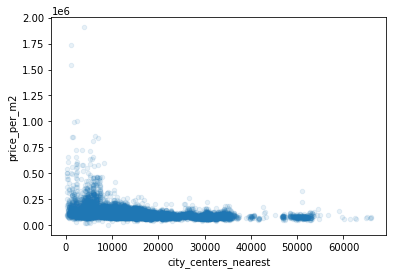

In [51]:
# посмотрим зависимость стоимости квадратного метра от удаленности от центра
df.plot(kind = 'scatter', y = 'price_per_m2', x = 'city_centers_nearest', alpha = 0.1)
df['city_centers_nearest'].corr(df['price_per_m2'])

Чем ближе к центру города, тем выше стоимость. Можно наблюдать пик в райне 4-7 км от центра - скорей всего, это спальные районы, в которых стоимость будет наибольшая.

,mean,count,median
weekday_exposition,,,
1,99724.102036,4175,95634.0
2,99605.522945,3966,95473.0
3,100192.723985,4286,95152.0
0,99469.933167,3606,94703.0
4,98986.768788,3992,94607.5
6,97762.693262,1692,94594.0
5,99065.810140,1933,93548.0


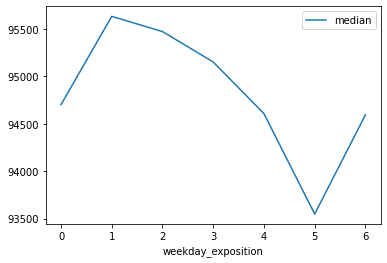

In [52]:
# посмотрим зависимость стоимости квадратного метра от дня недели
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
pivot_table_weekday_exposition.sort_values('median', ascending = False)

Дешевле всего стоят квартиры, объявления о которых опубликованы в субботу, а дороже всего - во вторник.

,mean,count,median
month_exposition,,,
4,101956.240624,2373,96451.0
8,100146.797359,1742,96102.5
11,99253.997043,2367,95625.0
9,100490.366347,1979,95608.0
3,98997.391170,2582,95293.0
1,99837.991952,1491,95209.0
7,99650.388757,1690,95023.5
2,98769.330049,2639,95000.0
12,99501.177656,1638,94238.0


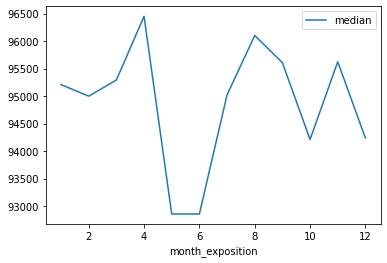

In [53]:
# посмотрим зависимость стоимости квадратного метра от месяца
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Дешевле всего квартиры в мае и июне, а дороже всего - в апреле и августе.

,mean,count,median
year_exposition,,,
2014,124301.926471,136,106901.5
2019,107123.332060,2879,103305.0
2018,97799.615014,8512,95704.0
2015,104718.653026,1173,93396.0
2017,97636.917776,8185,92569.0
2016,98294.930561,2765,91666.0


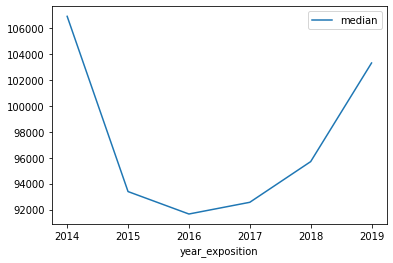

In [54]:
# посмотрим зависимость стоимости квадратного метра от года
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Никаких сюрпризов, все согласно росту экономики РФ в 2014-2019 годах.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [55]:
# найдем 10 населенный пунктов с наибольшим числом объявлений
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231
поселок мурино,556,85681.305755
поселок шушары,440,78676.904545
всеволожск,398,68654.007538
пушкин,369,103125.373984
колпино,338,75424.150888
поселок парголово,327,90175.489297
гатчина,307,68745.693811
деревня кудрово,299,92473.086957


In [56]:
# самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,15721,114848.565231


In [57]:
# самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
выборг,237,58141.489451


Видим, что самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений - в Санкт-Петербурге, тогда как самая низкая стоимость - в Выборге.

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр.

,price_per_m2
city_centers_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


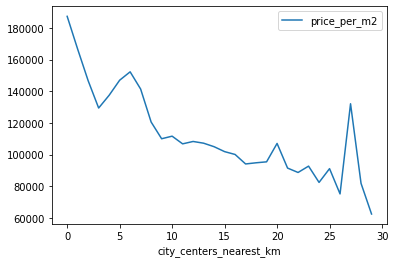

In [58]:
# создаем столбец с расстоянием до центра в километрах
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].fillna(1000).astype('int')
# посчитаем среднюю цену для каждого километра
pivot_table_km = df.query('locality_name == "санкт-петербург" and city_centers_nearest_km != 1000').pivot_table(index = 'city_centers_nearest_km', values = 'price_per_m2', aggfunc = 'mean')
# построим график
pivot_table_km.plot()
pivot_table_km

Центром города будем считать радиус в 7 километров.

In [59]:
# создадим датафрейм, выбрав квартиры в центре Питера
center_spb = df.query('city_centers_nearest_km <= 7 and locality_name == "санкт-петербург"')

count    3712.000000
mean       92.328303
std        60.531664
min        12.000000
25%        56.000000
50%        77.760000
75%       108.725000
max       900.000000
Name: total_area, dtype: float64

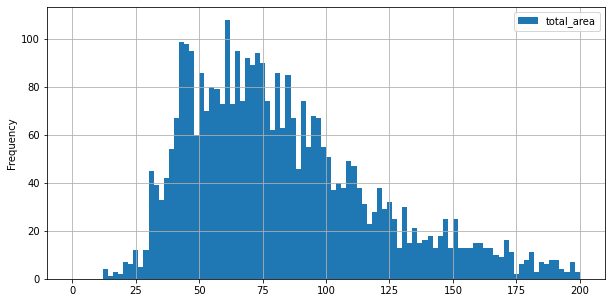

In [60]:
# изучим информацию о площади, построим гистограмму
center_spb.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,200))
center_spb['total_area'].describe()

count    3.712000e+03
mean     1.472962e+07
std      2.470451e+07
min      1.600000e+06
25%      6.590000e+06
50%      9.000000e+06
75%      1.413138e+07
max      7.630000e+08
Name: last_price, dtype: float64

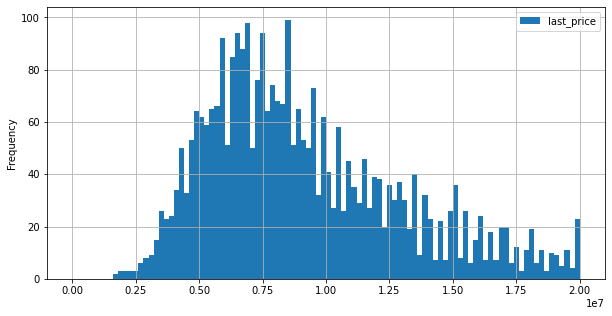

In [61]:
# изучим информацию о цене, построим гистограмму
center_spb.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,20000000))
center_spb['last_price'].describe()

count    3712.000000
mean        2.813308
std         1.456235
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

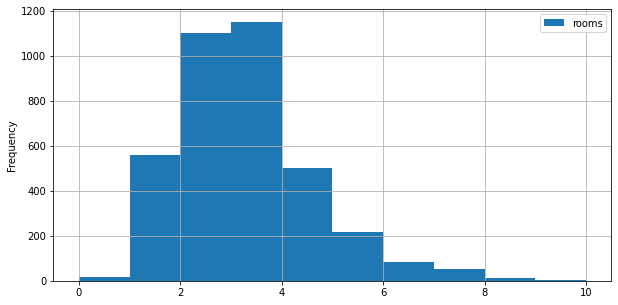

In [62]:
# изучим информацию о количестве комнат, построим гистограмму
center_spb.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (10,5), range = (0,10))
center_spb['rooms'].describe()

count    2408.000000
mean        3.102546
std         0.854724
min         2.000000
25%         2.800000
50%         3.000000
75%         3.280000
max        32.000000
Name: ceiling_height, dtype: float64

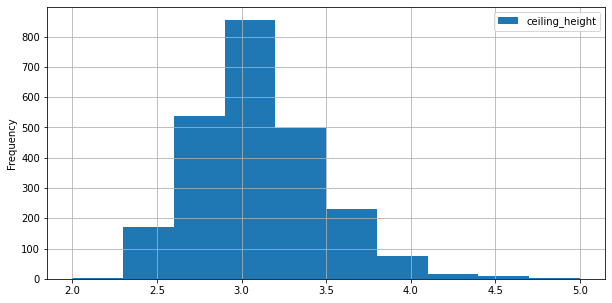

In [63]:
# изучим информацию о высоте потолков, построим гистограмму
center_spb.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (10,5), range = (2,5))
center_spb['ceiling_height'].describe()

**Вывод:** 

1. Среднее значение площади - 92 м2, медиана - 77 м2. Для всей выборки эти значения были равны 60 и 52 м2 соответсвенно.

2. Цены на недвижимость имеют среднее значение в 15 млн руб., медиана - 9 млн руб. Для всей выборки эти значения были равны 6,5 и 4,7 млн руб. соответсвенно.

3. Количество комнат - от 1 до 19. Больше всего двухкомнатных и трехкомнатных квартир (во всей выборке было больше всего однокомнатных и двухкомнатных квартир).

4. Высота потолков в среднем составляет 3,1 м, медиана - 3 м. Для всей выборки эти значения были равны 2,77 и 2,65 м соответсвенно.

Вполне логично, что в центре Питера квартиры будут посолиднее, а их стоимость - выше.

0.006246688801770299

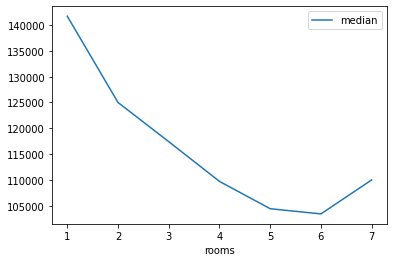

In [64]:
# посмотрим зависимость стоимости квадратного метра от количества комнат
center_spb_rooms = center_spb.pivot_table(index = 'rooms', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')
center_spb['rooms'].corr(center_spb['price_per_m2'])

В общей выборке стоимость метра квадратного была тем меньше, чем больше значение количества комнат стремилось к трем. В центре Питера же ситуация иная - чем больше комнат, тем меньше стоимость квадратного метра.

,mean,count,median
floor_category,,,
другой,147790.246136,2653,127551.0
первый,122401.977887,407,108653.0
последний,144362.099693,652,116872.5


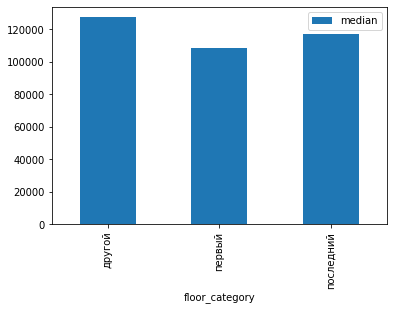

In [65]:
# посмотрим зависимость стоимости квадратного метра от этажа
center_spb_floor_category = center_spb.pivot_table(index = 'floor_category', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y='median', kind='bar')
center_spb_floor_category

Отличий от общей выборки нет: квартиры на первом этаже все так же стоят меньше всего, а на последнем - больше, чем на первом, но меньше, чем на остальных.

-0.03093861871911658

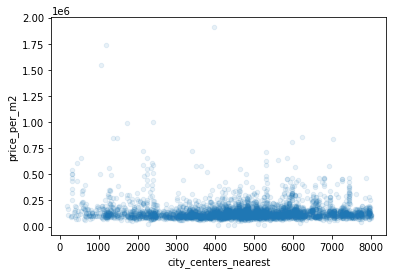

In [69]:
# посмотрим зависимость стоимости квадратного метра от удаленности от центра
center_spb.plot(kind = 'scatter', y = 'price_per_m2', x = 'city_centers_nearest', alpha = 0.1)
center_spb['city_centers_nearest'].corr(df['price_per_m2'])

Средняя стоимость все так же чуть выше на расстоянии 4-7 км от центра, где предположительно находятся спальные районы.

,mean,count,median
year_exposition,,,
2014,195653.962963,27,143465
2019,159568.695761,401,135614
2018,139974.577516,1103,124742
2017,142443.846732,1331,121698
2015,144722.881098,328,119102
2016,144263.772031,522,119047


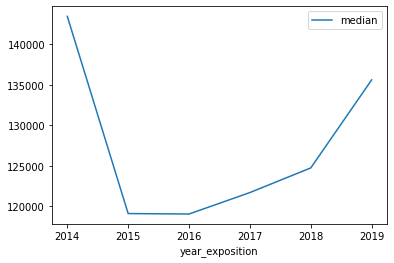

In [67]:
# посмотрим зависимость стоимости квадратного метра от года
center_spb_year_exposition = center_spb.pivot_table(index = 'year_exposition', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.plot(y = 'median')

center_spb_year_exposition.sort_values('median', ascending = False)

В общей выборке цены в 2015-2016 годах падали, однако в центре Питера они оставались на одном уровне.

## Общий вывод

Было выявлено, что на стоимость квадратного метра квартиры больше всего влияют общая площадь и близость к центру. Незначительно на стоимость квадратного метра влияют количество комнат, этаж квартиры, год размещения. День и месяц размещения оказывали довлольно слабое влияние на стоимость.

Было обнаружено, что в 2015-2016 годах стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае стоимость квартир оставалась примерно такой же.

Из этого можно сделать вывод, что, возможно, стомость на аналогичные квартиры в разных городах может быть совершенно разной, равно как и из зависимость от определенных параметров. Поэтому справедливо утверждение, что то, что характерно для общей выборки, не всегда характерно для конкретных случаев, поэтому для более детального анализа необоходимо проводить сегментацию рынка и анализировать данные для каждого населенного пункта.